In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date = session.query(func.max(Measurement.date)).first()
most_recent_date

('2017-08-23',)

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date

# Calculate the date one year from the last date in data set.
year_ago = dt.datetime(2017,8,23) - dt.timedelta(days=365)
print(year_ago)

# Perform a query to retrieve the data and precipitation scores
prcp_query = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= year_ago).all()
prcp_query

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_query, columns=['date', 'precipitation'])
prcp_df

# Sort the dataframe by date
# use sort_values()
prcp_df = prcp_df.sort_values('date')
prcp_df

2016-08-23 00:00:00


,date,precipitation
0,2016-08-24,0.08
1006,2016-08-24,NaN
1524,2016-08-24,2.15
702,2016-08-24,2.28
360,2016-08-24,2.15
...,...,...
1522,2017-08-22,0.00
1523,2017-08-23,0.08
359,2017-08-23,0.00
1005,2017-08-23,0.00


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_query

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [17]:
# use dictionary comprehension
# for something in a iterable container

# for date, prcp in prcp_query
{date: prcp for date, prcp in prcp_query}

{'2016-08-24': 1.45,
 '2016-08-25': 0.11,
 '2016-08-26': 0.01,
 '2016-08-27': None,
 '2016-08-28': 2.07,
 '2016-08-29': 0.9,
 '2016-08-30': 0.05,
 '2016-08-31': 2.46,
 '2016-09-01': 0.01,
 '2016-09-02': 0.03,
 '2016-09-03': 1.0,
 '2016-09-04': 0.44,
 '2016-09-05': 0.18,
 '2016-09-06': 1.0,
 '2016-09-07': 1.35,
 '2016-09-08': 0.15,
 '2016-09-09': 0.35,
 '2016-09-10': 1.16,
 '2016-09-11': 0.6,
 '2016-09-12': 1.04,
 '2016-09-13': 1.2,
 '2016-09-14': 6.7,
 '2016-09-15': 3.35,
 '2016-09-16': 0.61,
 '2016-09-17': 0.23,
 '2016-09-18': 0.42,
 '2016-09-19': 0.25,
 '2016-09-20': 0.43,
 '2016-09-21': 1.02,
 '2016-09-22': 0.75,
 '2016-09-23': 0.33,
 '2016-09-24': 0.27,
 '2016-09-25': 0.04,
 '2016-09-26': 1.02,
 '2016-09-27': 1.0,
 '2016-09-28': 0.05,
 '2016-09-29': 1.49,
 '2016-09-30': 0.38,
 '2016-10-01': 1.02,
 '2016-10-02': 0.61,
 '2016-10-03': 0.46,
 '2016-10-04': 3.46,
 '2016-10-05': 0.81,
 '2016-10-06': 0.04,
 '2016-10-07': 0.01,
 '2016-10-08': 0.04,
 '2016-10-09': 0.0,
 '2016-10-10': 0.0,
 

In [18]:
# check for missing values
prcp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2223 entries, 0 to 2222
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2223 non-null   object 
 1   precipitation  2015 non-null   float64
dtypes: float64(1), object(1)
memory usage: 52.1+ KB


In [19]:
# drop nan using dropna
prcp_df.dropna(inplace=True)
prcp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2015 entries, 0 to 2222
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2015 non-null   object 
 1   precipitation  2015 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.2+ KB


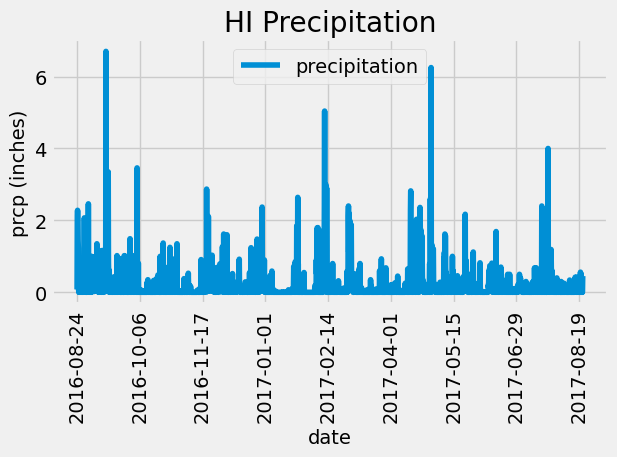

In [20]:
# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(x='date', y='precipitation', rot=90)

# add title, y labels
plt.title("HI Precipitation")
plt.ylabel('prcp (inches)')
plt.tight_layout()
plt.savefig("./Images/HI_Precp_2016_2017.png")
plt.show()

In [21]:

# Use Pandas to calculate the summary statistics for the precipitation data
# using describe()
prcp_df.describe()



,precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [22]:
# Design a query to calculate the total number of stations in the dataset
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(Station.station).all()
total_stations

# get count
count_of_stations = session.query(func.count(Station.station)).first()[0]
count_of_stations

9

In [23]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_activity = session.query(Measurement.station, func.count(Measurement.station)).\
                    group_by(Measurement.station).\
                    order_by(func.count(Measurement.station).desc()).all()
                    
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [24]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.


# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = station_activity[0]
most_active_station

# get lowest, highest, and average temp, sue sel technique
#
highest_temp = session.query(func.max(Measurement.tobs)).all()[0][0]
highest_temp

average_temp = session.query(func.avg(Measurement.tobs)).all()[0][0]
average_temp

lowest_temp = session.query(func.min(Measurement.tobs)).all()[0][0]
lowest_temp



53.0

In [25]:
# sel technique
sel = [func.max(Measurement.tobs),
       func.avg(Measurement.tobs),
       func.min(Measurement.tobs)]

temp_stats = session.query(*sel).\
            filter(Measurement.station == 'USC00519281').all()
temp_stats

[(85.0, 71.66378066378067, 54.0)]

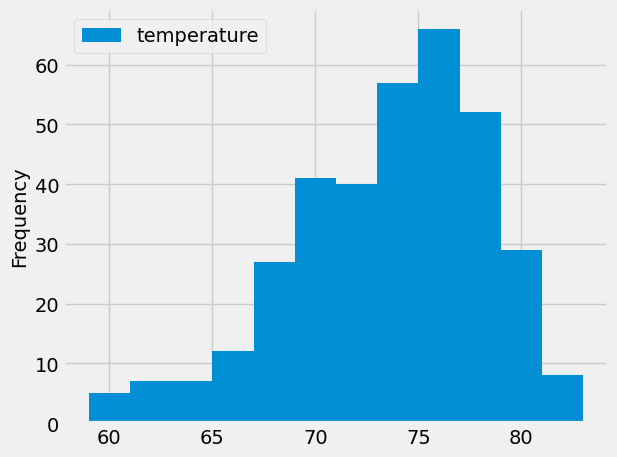

In [26]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
most_active_station_query = session.query(Measurement.tobs).\
                            filter(Measurement.station == 'USC00519281').\
                            filter(Measurement.date >= year_ago).all()
most_active_station_query

# create DataFrame
tobs_df = pd.DataFrame(most_active_station_query, columns=['temperature'])
tobs_df

# make a histogram
tobs_df.plot.hist(bins=12)

plt.tight_layout()
plt.savefig("./Images/HI_temps_2016_2017.png")             

plt.show()

# Close Session

In [27]:
# Close Session
session.close()